In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [1]:
import re
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

In [3]:
passDict = dict()

with open('traffic.txt', 'r') as file:
    for line in file:
        string = line.split()
        mString = string[0]
        month = int(re.findall(r'MonthNum_(\d+$)', mString)[0])
        nPassengers = int(string[1])
        if passDict.has_key(month):
            passDict[month].append(nPassengers)
        else:
            passDict[month] = [nPassengers,]
            
file.close()

In [4]:
passengers = pd.DataFrame.from_dict(passDict, orient='index')
passengers.columns = ['#Passengers']
rng = pd.date_range('1/1/2016', periods=60, freq='M') # Read from std.in
passengers.index = rng
ts = passengers['#Passengers']

ts_log = np.log(ts)
moving_avg = pd.rolling_mean(ts_log,12)

ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

pred2 = results_ARIMA.predict(start = 60, end = 71, exog = np.array(range(61,72)))

x = np.exp(pred2 + ts_log.mean())
for value in x.values:
    print int(value)

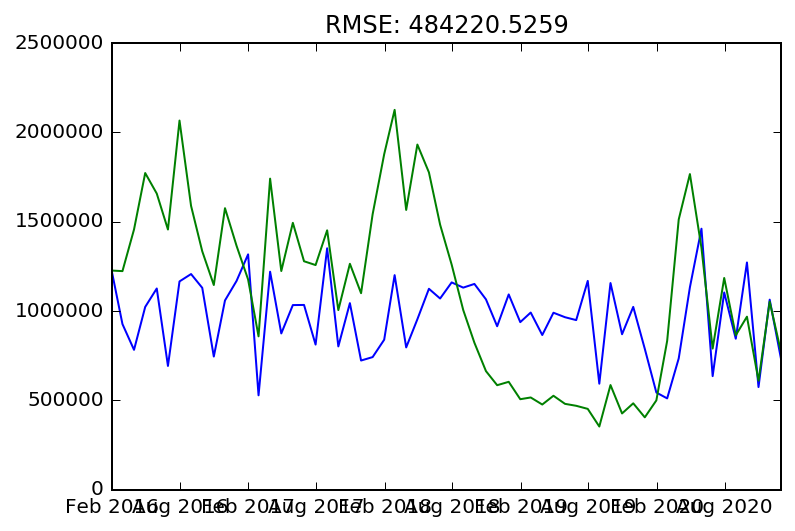

In [57]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [53]:
1563178
1312558
1312558
1388316
1325942
1312550
587396
1293945
1061128
590392
1092215
1446327

1446327

In [ ]:
973046
831706
879918
995014
1142157
876328
1082270
1025559
1102495
859819
956835
903350